In [ ]:
import pandas as pd
import numpy as np

# to plot things
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN

In [ ]:
x = pd.read_csv("Mall_Customers.csv")
x.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# 1 for female
# 0 for male
x["Gender"] = x.Gender.apply(lambda x: 1 if x == "Female" else 0)
x.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [ ]:
DBscan = DBSCAN(eps=18, min_samples=7)
DBscan.fit(x)
clusters = DBscan.labels_
print(clusters)

[-1  0 -1  0 -1  0 -1  0 -1  0 -1 -1  1  0 -1  0  2  0  1 -1  2  0  1  0
  1  0  2  0  2  0  1  0  1  0  1  0  2  0  2  0 -1  0  3  0  3  0  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  4 -1  4  3  4 -1  4 -1  4 -1  4 -1  4 -1  4 -1  4 -1  4 -1  4
 -1  4  5  4  5  4  5  4  5  4  5  4 -1  4 -1  4  5  4 -1  4  5  4  5  4
  5  4  5  4  5  4  5  4  5  4  5  4 -1  4  5  4 -1  4  5 -1  5  4  5  4
 -1  4 -1 -1 -1 -1 -1 -1]


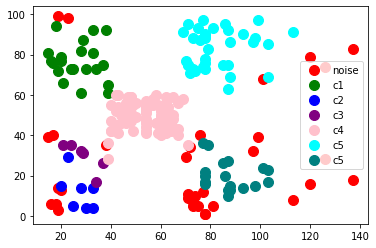

In [ ]:
plt.scatter(x.iloc[clusters == -1, 3], x.iloc[clusters == -1, 4], s = 100, c = 'red', label = 'noise')
plt.scatter(x.iloc[clusters == 0, 3], x.iloc[clusters == 0, 4], s = 100, c = 'green', label = 'c1')
plt.scatter(x.iloc[clusters == 1, 3], x.iloc[clusters == 1, 4], s = 100, c = 'blue', label = 'c2')
plt.scatter(x.iloc[clusters == 2, 3], x.iloc[clusters == 2, 4], s = 100, c = 'purple', label = 'c3')
plt.scatter(x.iloc[clusters == 3, 3], x.iloc[clusters == 3, 4], s = 100, c = 'pink', label = 'c4')
plt.scatter(x.iloc[clusters == 4, 3], x.iloc[clusters == 4, 4], s = 100, c = 'cyan', label = 'c5')
plt.scatter(x.iloc[clusters == 5, 3], x.iloc[clusters == 5, 4], s = 100, c = 'teal', label = 'c5')

plt.legend()

In [ ]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics import euclidean_distances
from math import ceil
import numpy as np
import time


def betacv_simple(data, labels, size=3000, metric='euclidean'):
    n = labels.shape[0]
    n_slices = ceil(n/size)
    intra = 0
    inter = 0
    n_in = 0
    n_out = 0
    last = 0
    labels_unq = np.unique(labels)
    members = np.array([member_count(labels, i) for i in labels_unq])
    N_in = np.array([i*(i-1) for i in members])
    n_in = np.sum(N_in)
    N_out = np.array([i*(n-i) for i in members])
    n_out = np.sum(N_out)
    
    for i in range(n_slices):
        x = data[last:(last+size), :]
        distances = euclidean_distances(x, data)
        j_range = min(size, n-size*i)
        A = np.array([intra_cluster_distance(distances[j], labels, j+last)
                  for j in range(j_range)])
        B = np.array([inter_cluster_distance(distances[j], labels, j+last)
                  for j in range(j_range)])
        intra += np.sum(A)
        inter += np.sum(B)
        last += size

    betacv = (intra/n_in)/(inter/n_out)
    print('simple intra:', intra)
    print('simple inter:', inter)
    print('simple n_in :', n_in)
    print('simple n_out:', n_out)
    return betacv

def betacv(data, labels, metric='euclidean'):
    distances = pairwise_distances(data, metric=metric)
    n = labels.shape[0]
    A = np.array([intra_cluster_distance(distances[i], labels, i)
                  for i in range(n)])
    B = np.array([inter_cluster_distance(distances[i], labels, i)
                  for i in range(n)])
    a = np.sum(A)
    b = np.sum(B)
    labels_unq = np.unique(labels)
    members = np.array([member_count(labels, i) for i in labels_unq])
    N_in = np.array([i*(i-1) for i in members])
    n_in = np.sum(N_in)
    N_out = np.array([i*(n-i) for i in members])
    n_out = np.sum(N_out)
    betacv = (a/n_in)/(b/n_out)
    print('intra:', a)
    print('inter:', b)
    print('n_in :', n_in)
    print('n_out:', n_out)
    return betacv

def intra_cluster_distance(distances_row, labels, i):
    mask = labels == labels[i]
    mask[i] = False
    if not np.any(mask):
        # cluster of size 1
        return 0
    a = np.sum(distances_row[mask])
    return a

def inter_cluster_distance(distances_row, labels, i):
    mask = labels != labels[i]
    b = np.sum(distances_row[mask])
    return b

def member_count(labels, i):
    mask = labels == i
    return len(labels[mask])

In [ ]:
# BetaCV is the ratio between the average of intra-cluster distance to the average of inter-claster distance.
# The smaller BetaCV value indicates the better the clustering.
betacv(x,clusters)

intra: 421518.5842341928
inter: 3036983.9735263074
n_in : 9364
n_out: 30436


0.45112863785361307

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fb83b848-cf51-4fc0-9695-a662b8da952c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>